# Common Emitter Amplifier - Simple Biasing with Grounded Emitter

A study and useful calculator for a "simply biased" Common Emitter amplifier with grounded emitter.


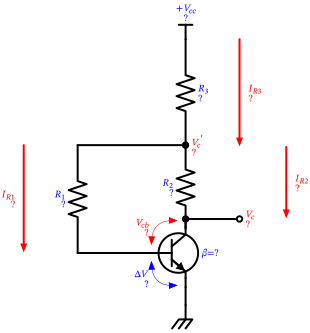

In [1]:
# import math
import sys

import ipywidgets as widgets
from eseries import E12, E24, E48, E96, erange
from IPython.display import HTML, Latex, display

sys.path.append("../../lib")
from biasing import (
    CE_gndEmitter_simple_bias,
    draw_CE_gndEmitter_simple_bias,
    solve_CE_gndEmitter_simple_bias,
)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

display(draw_CE_gndEmitter_simple_bias().draw())

In [2]:
simple_bias_system_eqs = solve_CE_gndEmitter_simple_bias()

>>> system of equations >>>


Eq(V_c, -I_R2*R_2 + V_pc)

Eq(I_R1, (-Delta_V + V_pc)/R_1)

Eq(I_R2, I_R1*beta)

Eq(V_pc, -I_R3*R_3 + V_cc)

Eq(I_R3, I_R1 + I_R2)

Eq(V_cb, -Delta_V + V_c)

>>> Solved/expanded for (I_R1, I_R2, I_R3, V_pc, V_c, V_cb) >>>


'I_R1'

Eq(I_R1, (-Delta_V + V_cc)/(R_1 + R_3*beta + R_3))

'I_R2'

Eq(I_R2, (-Delta_V*beta + V_cc*beta)/(R_1 + R_3*beta + R_3))

'I_R3'

Eq(I_R3, (-Delta_V*beta - Delta_V + V_cc*beta + V_cc)/(R_1 + R_3*beta + R_3))

'V_pc'

Eq(V_pc, (Delta_V*R_3*beta + Delta_V*R_3 + R_1*V_cc)/(R_1 + R_3*beta + R_3))

'V_c'

Eq(V_c, (Delta_V*R_2*beta + Delta_V*R_3*beta + Delta_V*R_3 + R_1*V_cc - R_2*V_cc*beta)/(R_1 + R_3*beta + R_3))

'V_cb'

Eq(V_cb, (-Delta_V*R_1 + Delta_V*R_2*beta + R_1*V_cc - R_2*V_cc*beta)/(R_1 + R_3*beta + R_3))

In [3]:
layout = widgets.Layout(width="auto")
style = {"description_width": "100px"}
res_series = E24


def _(
    trans_type="npn", R_1=510000, R_2=1000, R_3=100, beta=190, Delta_V=0.723, V_cc=12
):
    CE_gndEmitter_simple_bias(
        dict(
            R_1=R_1,
            R_2=R_2,
            R_3=R_3,
            beta=beta,
            Delta_V=Delta_V,
            V_cc=V_cc,
        ),
        trans_type=trans_type,
        solutions=simple_bias_system_eqs,
    )


interactive_CE_gndEmitter_simple_bias = widgets.interactive(
    _,
    trans_type=widgets.Select(
        description="Transistor Type",
        options=["npn", "pnp"],
        value="npn",
        rows=2,
        style=style,
    ),
    V_cc=widgets.FloatText(
        value=12.0,
        description="$V_{cc}$",
        style=style,
    ),
    R_1=widgets.SelectionSlider(
        value=510000,
        description="$R_1$",
        options=list(erange(res_series, 10000.0, 2000000.0)),
        style=style,
        layout=layout,
    ),
    R_2=widgets.SelectionSlider(
        value=1000,
        description="$R_2$",
        options=list(erange(res_series, 0.001, 20000.0)),
        style=style,
        layout=layout,
    ),
    R_3=widgets.SelectionSlider(
        value=100,
        description="$R_3$",
        options=list(erange(res_series, 10.0, 20000.0)),
        style=style,
        layout=layout,
    ),
    beta=widgets.FloatText(
        value=190,
        description="$\\beta$",
        style=style,
    ),
    Delta_V=widgets.FloatText(
        value=0.76,
        description="$\\Delta V$",
        style=style,
    ),
)
display(interactive_CE_gndEmitter_simple_bias)

interactive(children=(Select(description='Transistor Type', options=('npn', 'pnp'), rows=2, style=DescriptionS…

---
## Biasing 2SC2498 at 4mA

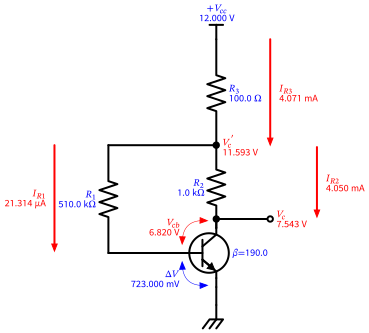

In [4]:
CE_gndEmitter_simple_bias(
    dict(
        R_1=510000,
        R_2=1000,
        R_3=100,
        beta=190,
        Delta_V=0.723,
        V_cc=12,
    ),
    trans_type="npn",
    solutions=simple_bias_system_eqs,
)

---

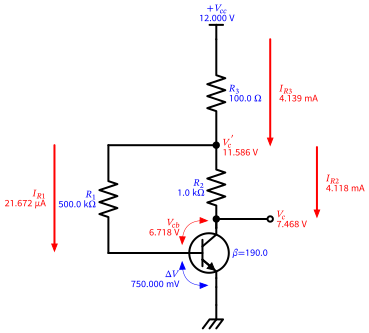

In [5]:
CE_gndEmitter_simple_bias(
    dict(
        R_1=500000,
        R_2=1000,
        R_3=100,
        beta=190,
        Delta_V=0.75,
        V_cc=12,
    ),
    trans_type="npn",
    solutions=simple_bias_system_eqs,
)

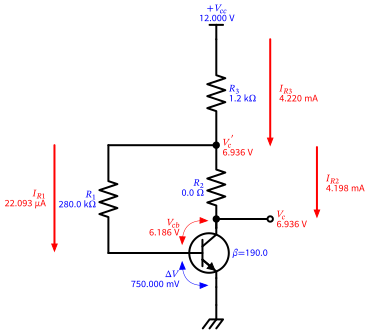

In [6]:
CE_gndEmitter_simple_bias(
    dict(
        R_1=280000,
        R_2=0,
        R_3=1200,
        beta=190,
        Delta_V=0.75,
        V_cc=12,
    ),
    trans_type="npn",
    solutions=simple_bias_system_eqs,
)